## Download the dataset from kaggle

In [1]:
# Step 1: Upload the kaggle.json file
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

# Step 2: Move the kaggle.json file to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Install Kaggle library (if not already installed)
!pip install kaggle

# Step 4: Download the dataset (example: Titanic dataset)
!kaggle competitions download -c titanic

# Step 5: Unzip the downloaded dataset (if necessary)
!unzip titanic.zip

Saving kaggle.json to kaggle.json
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 2.89MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
# Download the dataset
!kaggle datasets download -d meirnizri/covid19-dataset

# Unzip the dataset
!unzip covid19-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/meirnizri/covid19-dataset
License(s): CC0-1.0
 86% 4.00M/4.66M [00:00<00:00, 6.29MB/s]
100% 4.66M/4.66M [00:00<00:00, 5.20MB/s]
Archive:  covid19-dataset.zip
  inflating: Covid Data.csv          


## Import necessary libraries and load the dataset

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import joblib
from imblearn.over_sampling import SMOTE

In [4]:
# Load the dataset
df = pd.read_csv('Covid Data.csv')

# Display the first few rows of the dataset
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
# Print the column names
print(df.columns)

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')


In [ ]:
# Print the dataset description
print(df.describe())

              USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE       INTUBED  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00  7.952288e+01   
std    4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01  3.686889e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00  9.700000e+01   
50%    2.000000e+00  1.200000e+01  1.000000e+00  1.000000e+00  9.700000e+01   
75%    2.000000e+00  1.200000e+01  2.000000e+00  1.000000e+00  9.700000e+01   
max    2.000000e+00  1.300000e+01  2.000000e+00  2.000000e+00  9.900000e+01   

          PNEUMONIA           AGE      PREGNANT      DIABETES          COPD  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   3.346831e+00  4.179410e+01  4.976558e+01  2.186404e+00  2.260569e+00   
std    1.191288e+01  1.690739e+01  4.751073e+01  5.

In [ ]:
# Print the dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

## Data Visualizations

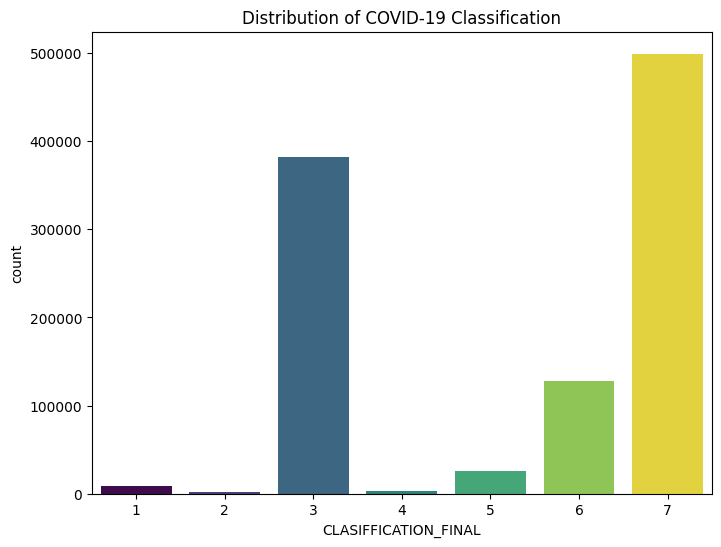

In [ ]:
# Visualization 1: Distribution of the target variable ('CLASIFFICATION_FINAL')
plt.figure(figsize=(8, 6))
sns.countplot(x='CLASIFFICATION_FINAL', data=df, palette='viridis', hue='CLASIFFICATION_FINAL', legend=False)
plt.title('Distribution of COVID-19 Classification')
plt.show()

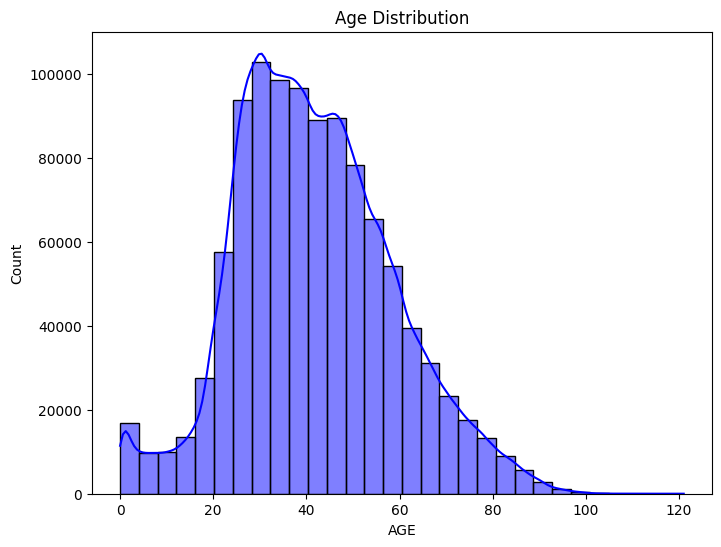

In [ ]:
# Visualization 2: Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

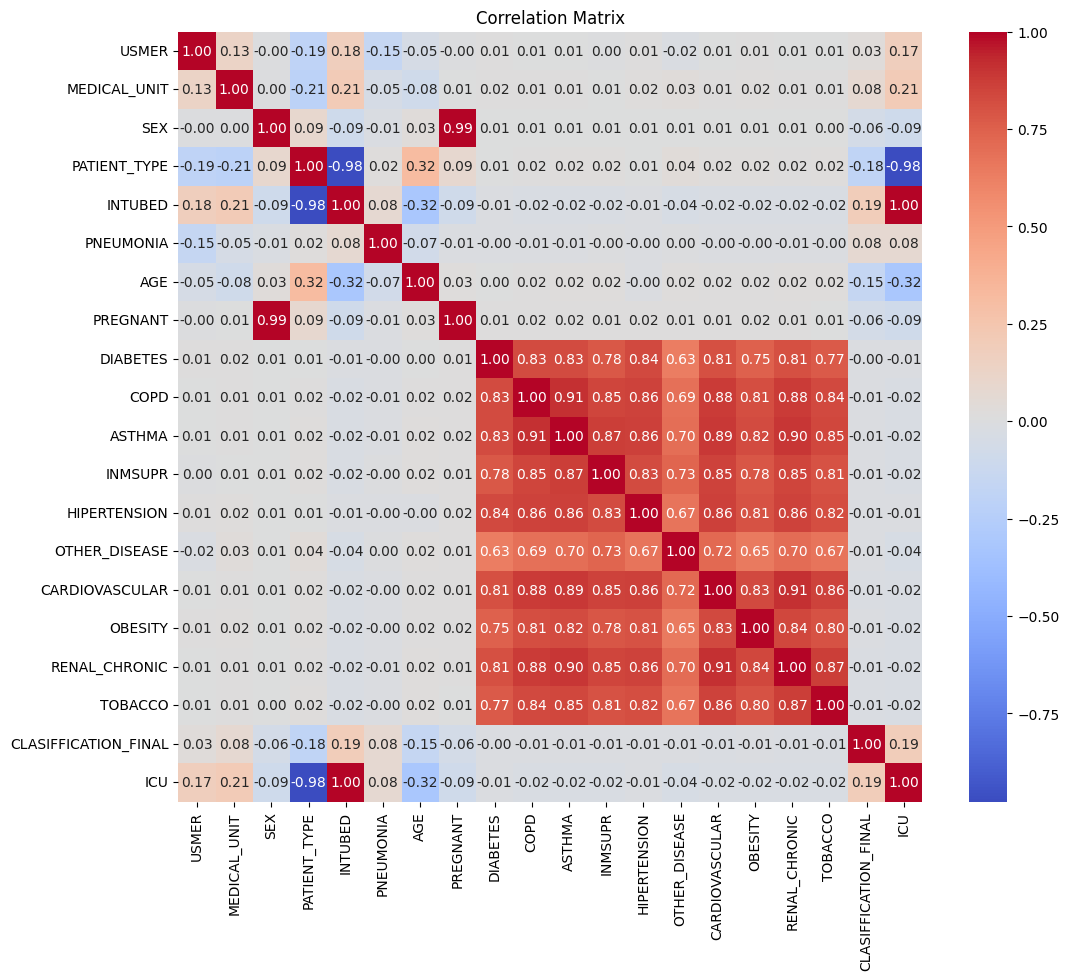

In [ ]:
# Visualization 3: Correlation matrix
plt.figure(figsize=(12, 10))
# Convert date columns to datetime objects if needed
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

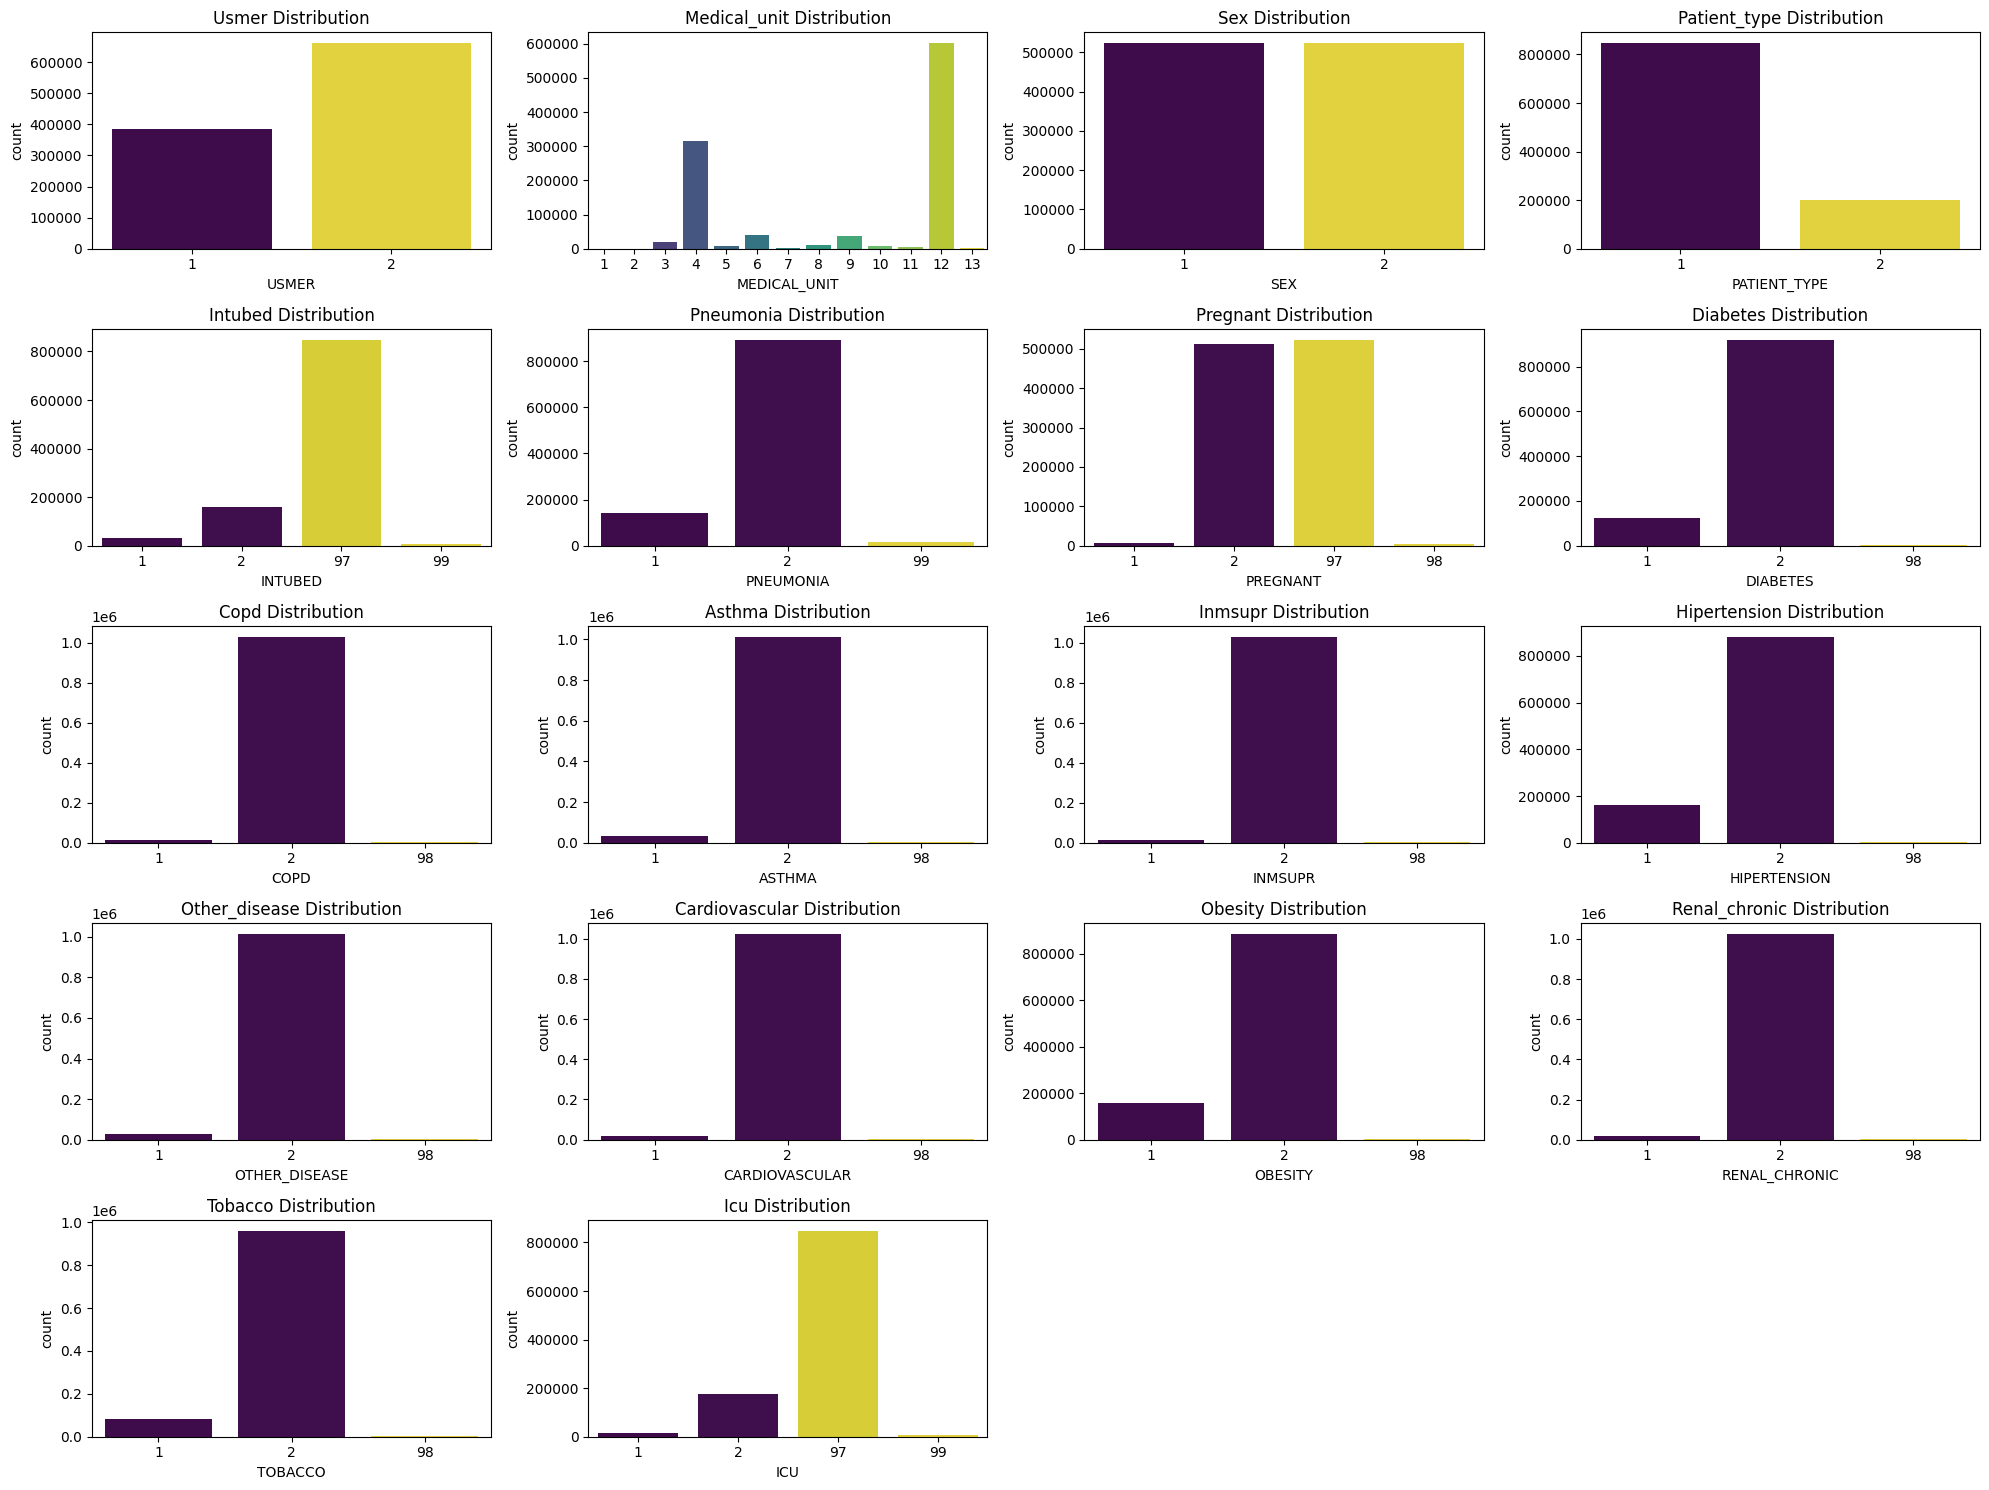

In [ ]:
# Visualization 4: Countplot for categorical features
categorical_features = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
                        'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
                        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
                        'ICU']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)
    sns.countplot(x=feature, data=df, palette='viridis', hue=feature, legend=False)
    plt.title(f'{feature.capitalize()} Distribution')
plt.tight_layout()
plt.show()

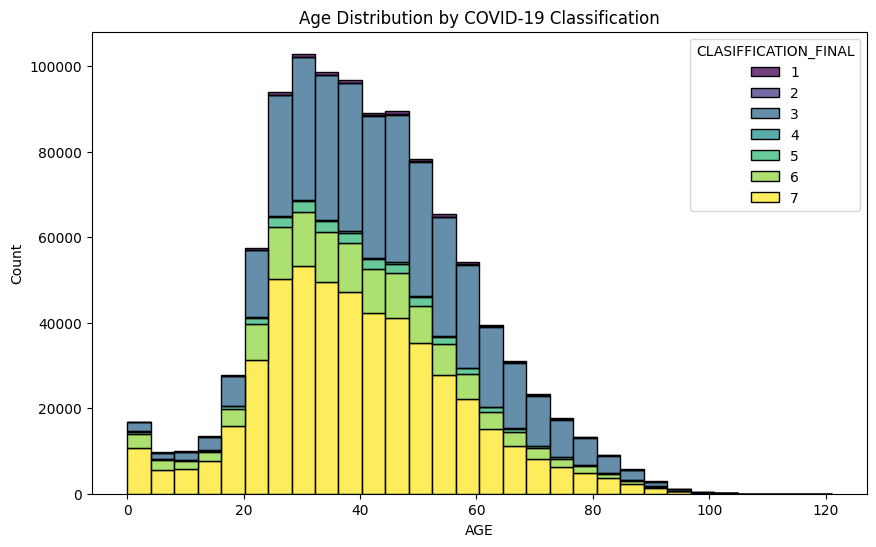

In [ ]:
# Visualization 5: Age distribution by COVID-19 classification
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', hue='CLASIFFICATION_FINAL', multiple='stack', palette='viridis', bins=30)
plt.title('Age Distribution by COVID-19 Classification')
plt.show()

## Data Preparation and Preprocessing

In [5]:
# Check duplication percentage:
(df.duplicated().sum()/df.shape[0])*100

77.44310135183463

In [6]:
# Check for missing values before cleaning
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


Let's reveal the exact missing values

In [7]:
# Print null values for each attributes
df_null = df.copy()
for i in [97, 98, 99]:
   df_null.replace(i , np.nan, inplace = True)

df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

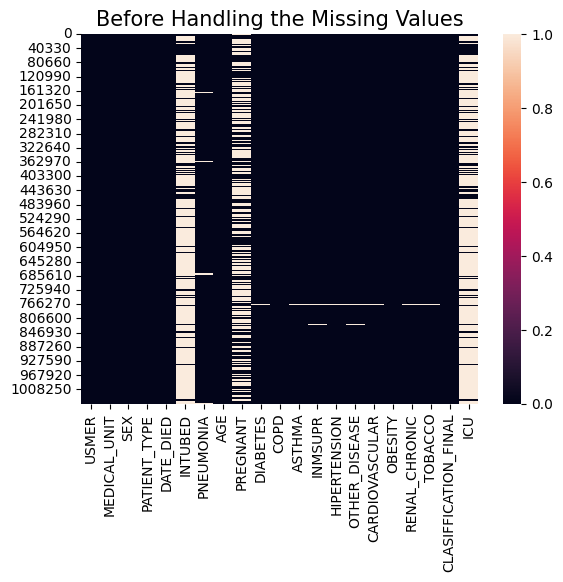

In [42]:
# Plot null values before preprocessing
sns.heatmap(df_null.isnull())
plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

Creating target variable "DEAD"

1 means that the patient has died and 0 is otherwise

In [10]:
# add attribute "DEAD" in the dataframe
df['DEAD'] = [0 if i=='9999-99-99' else 1 for i in df.DATE_DIED]

# Print the count of attribute DEAD
df['DEAD'].value_counts()

DEAD
0    971633
1     76942
Name: count, dtype: int64

Let's deal with the missing date (values of 97, 98 and 99):

We can notice that we have major missing values at the following features:
"ICU", "INTUBED" and "PREGNANT"

In [11]:
# Females corresponding values in 'PREGNANT' feature
df[(df['SEX'] == 1)]['PREGNANT']

0          2
3          2
5          2
6          2
7          2
          ..
1048563    2
1048564    2
1048565    2
1048567    2
1048569    2
Name: PREGNANT, Length: 525064, dtype: int64

In [13]:
# Count of female in 'PREGNANT' feature
df[(df['SEX'] == 1)]['PREGNANT'].value_counts()

PREGNANT
2     513179
1       8131
98      3754
Name: count, dtype: int64

The sum of the above counts is equal to the number of all females.

In [14]:
# Males corresponding values in 'PREGNANT' feature
df[(df['SEX'] == 2)]['PREGNANT']

1          97
2          97
4          97
11         97
12         97
           ..
1048570    97
1048571    97
1048572    97
1048573    97
1048574    97
Name: PREGNANT, Length: 523511, dtype: int64

In [15]:
# Count of male in 'PREGNANT' feature
df[(df['SEX'] == 2) & (df['PREGNANT'])]['PREGNANT'].value_counts()

PREGNANT
97    523511
Name: count, dtype: int64

In [16]:
# Count of values in 'PREGNANT' feature
df['PREGNANT'].value_counts()

PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64

We noticed that all values of 98 are of the missing values corresponding to the female values, while all those of 97 are of the ones corresponding to the male values.
So we can replace all the corresponding values to the male section (97) with (2) and as we all know male cannot get pregnant hahaha.

However, we cannot replace the female section (98) with (1) because we don't know exactly whether those females were pregnant or not.

In [17]:
# Replacing "97" with "2"
df['PREGNANT'].replace (97, 2, inplace = True)

# Count of values in 'PREGNANT' feature
df['PREGNANT'].value_counts()

PREGNANT
2     1036690
1        8131
98       3754
Name: count, dtype: int64

In [18]:
# Count of values in 'ICU' feature
df.ICU.value_counts()

ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64

In [19]:
# Iterate over combinations of PATIENT_TYPE and ICU to print the shape of filtered DataFrame
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at ICU = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['ICU'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at ICU = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 1 the shape will be: 

(16858, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 2 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 2 the shape will be: 

(175685, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 97 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 99 the shape will be: 

(0, 22) 
 -----------------

From the above we can see that the missing values of (97) are all corresponding to the values of PATIENT_TYPE = 1 which is for non hospitalized patients, while those of (99) are the missing values of the hospitalized patients, which cannot be identified.


So we can replace all the values of (97) with (2); since patients who have never been hospitalized couldn't possibly be admitted to the ICU.

In [20]:
# Replacing "97" with "2"
df['ICU'].replace (97, 2, inplace = True)

# Count of values in 'ICU' feature
df.ICU.value_counts()

ICU
2     1024229
1       16858
99       7488
Name: count, dtype: int64

In [21]:
# Count of values in 'INTUBED' feature
df.INTUBED.value_counts()

INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64

In [22]:
# Iterate over combinations of PATIENT_TYPE and INTUBED to print the shape of filtered DataFrame
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at INTUBED = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['INTUBED'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at INTUBED = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 1 the shape will be: 

(33656, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 2 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 2 the shape will be: 

(159050, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 97 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at INTUBED = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at INTUBED = 99 the shape will be: 


Same case with ICU.

So we can go ahead and replace (97) with (2)

In [23]:
# Replacing "97" with "2"
df['INTUBED'].replace (97, 2, inplace = True)

# Count of values in 'INTUBED' feature
df.INTUBED.value_counts()

INTUBED
2     1007594
1       33656
99       7325
Name: count, dtype: int64

So, all the rest of these missing values (98 & 99) can't be handled as they will affect our analysis, which is based on true and actual real life values.

We can't fill them by random using any filling (imputation) technique.

In [28]:
# Replace values 98 and 99 with NaN in the DataFrame
for i in [98, 99]:
   df.replace(i , np.nan, inplace = True)

In [29]:
# Print the updated dataframe
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,03/05/2020,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,03/06/2020,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,12/06/2020,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,21/06/2020,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048571,1,13,2,2,9999-99-99,2.0,2.0,51.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048572,2,13,2,1,9999-99-99,2.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048573,2,13,2,1,9999-99-99,2.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0


In [30]:
# Let's handle the missing values on "DATE_DIED" feature
df_null2 = df.copy()
df_null2.DATE_DIED = df_null2.DATE_DIED.fillna("9999-99-99")

In [31]:
#Let's check again for our missing values:
df_null2.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
INTUBED                  7325
PNEUMONIA               16003
AGE                       210
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
ICU                      7488
DEAD                        0
dtype: int64

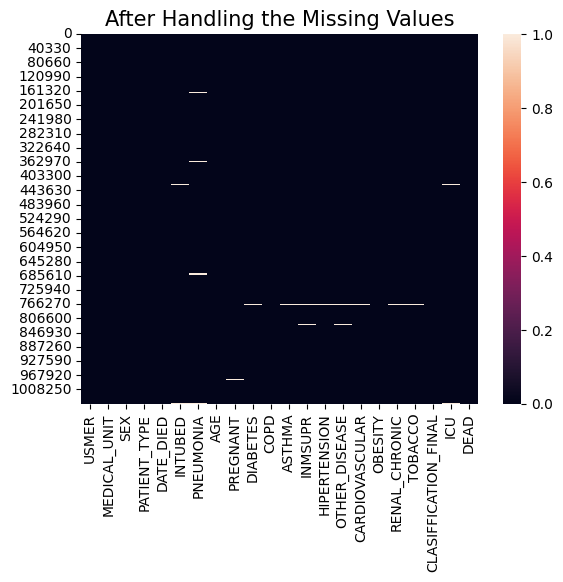

In [41]:
# Plot null values after preprocessing
sns.heatmap(df_null2.isnull())
plt.title('After Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

## Data Exploration

1- How many people have died?

In [33]:
dict(df['DEAD'].value_counts())[1]

76942

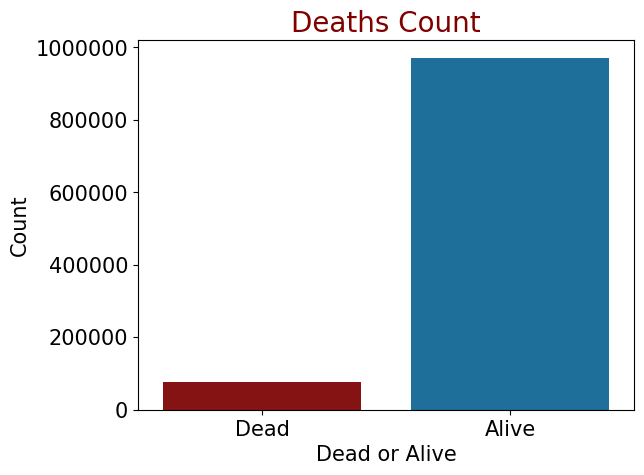

In [40]:
# Plot of death count
D = df['DEAD']
D = D.replace(1, "Dead")
D = D.replace(0, "Alive")

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Deaths Count', color='#800000', fontsize=20)
sns.countplot(x=D, hue=D, palette=['#990000', '#0a75ad'], legend=False)
plt.xlabel("Dead or Alive", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

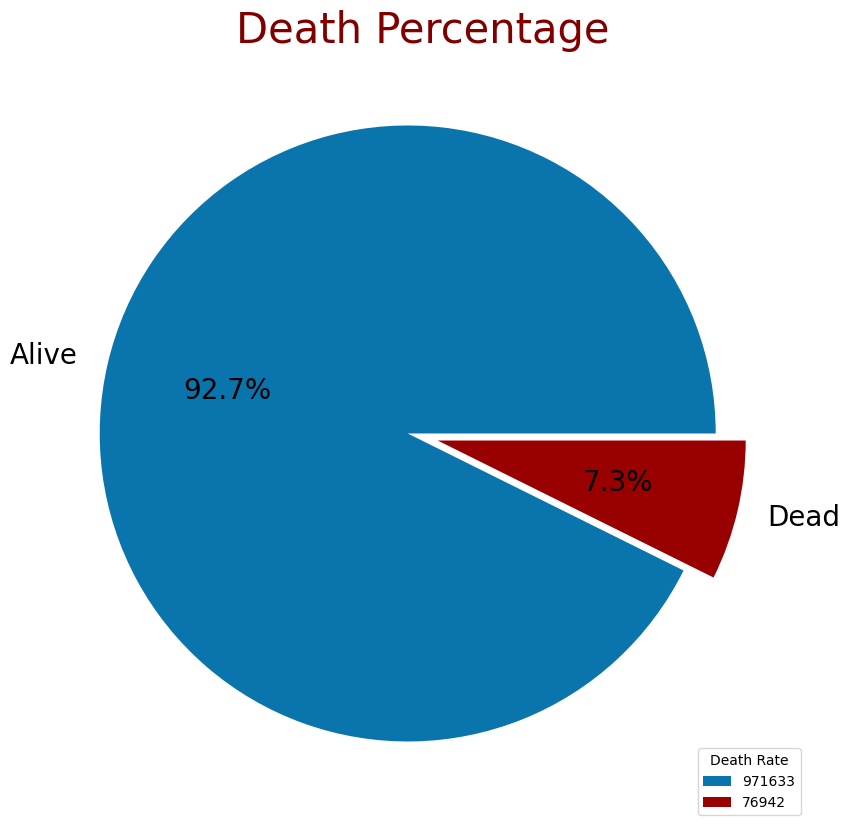

In [43]:
# Pie chart of death percentage
labels = ["Alive", "Dead"]
sizes = df['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage',color = '#800000',fontsize = 30)
plt.legend(df['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

2- How many patients were hospitalized?

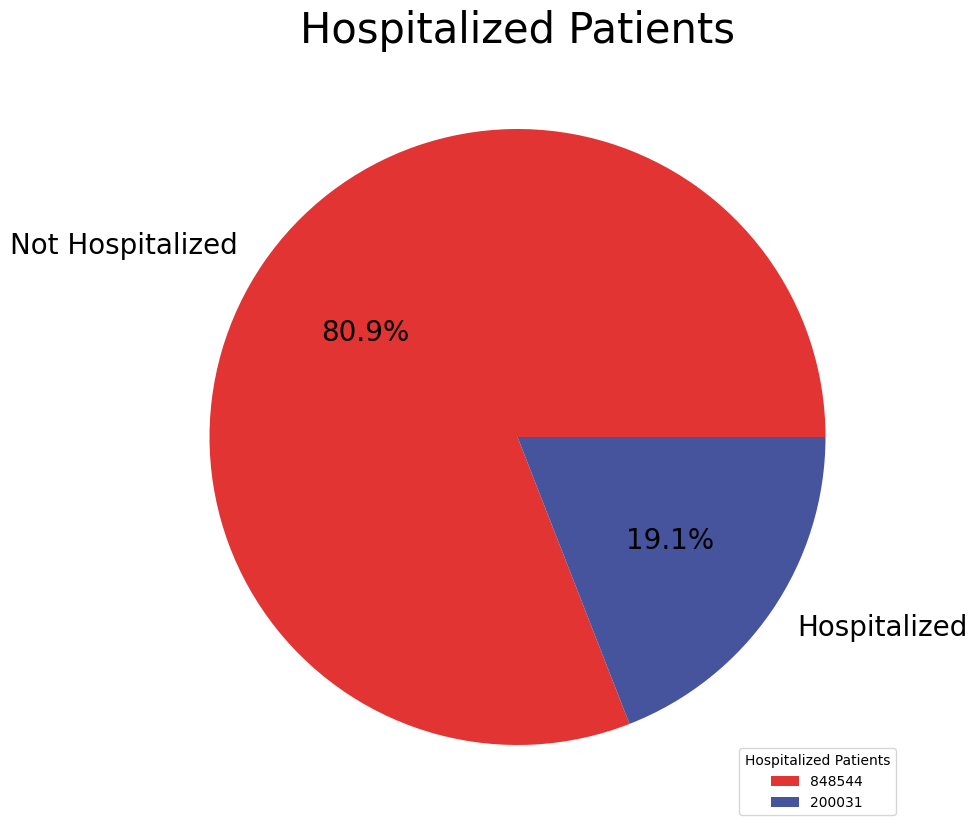

In [56]:
# Plot the hospitalized patients
labels = ["Not Hospitalized", "Hospitalized"]
sizes = df['PATIENT_TYPE'].value_counts()
colors = ['#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('Hospitalized Patients',color = 'black',fontsize = 30)
plt.legend(df['PATIENT_TYPE'].value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

3- How many of them (hospitalized people) have died?

In [58]:
# Create a DataFrame df_hosp containing only hospitalized patients (PATIENT_TYPE equals 2)
df_hosp = df[df['PATIENT_TYPE']==2]

In [62]:
# Replace the values in the 'DEAD' column of df_hosp with "Dead" for 1 and "Alive" for 0
df_hosp.loc[:, 'DEAD'] = df_hosp['DEAD'].replace({1: "Dead", 0: "Alive"})

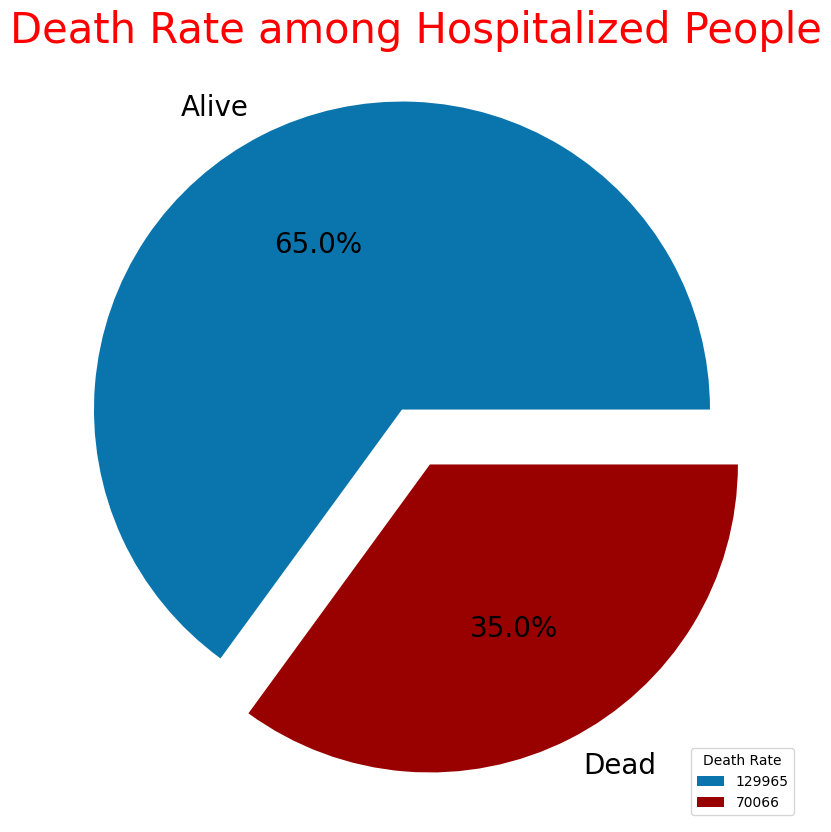

In [63]:
# Plot a pie chart of death rate among hospitalized people
labels = ["Alive", "Dead"]
sizes = df_hosp['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among Hospitalized People', color = 'red', fontsize = 30)
plt.legend(df_hosp['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

4- How many of those ICU patients have died?

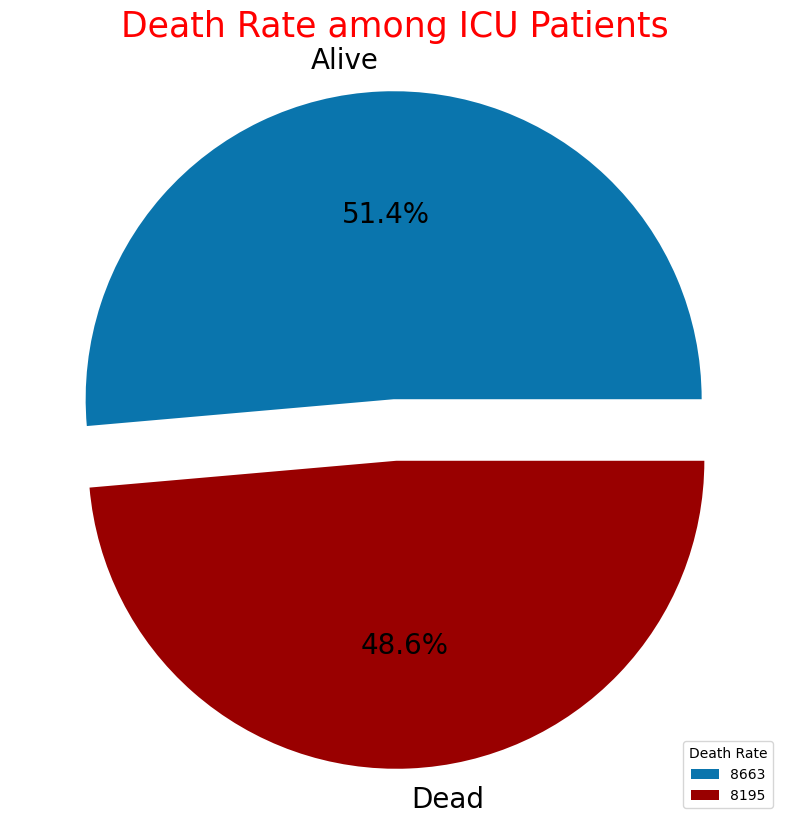

In [67]:
# Plot a pie chart of death rate among ICU Patients
labels = ["Alive", "Dead"]
sizes = df[(df['ICU'] == 1)]['DEAD'].value_counts()
colors = [ '#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among ICU Patients', color = 'red', fontsize = 25)
plt.legend(df[(df['ICU'] == 1)]['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

## Modeling and Results

In [81]:
df['DEAD']

0           Dead
1           Dead
2           Dead
3           Dead
4           Dead
           ...  
1048570    Alive
1048571    Alive
1048572    Alive
1048573    Alive
1048574    Alive
Name: DEAD, Length: 1048575, dtype: object

as we can see above the target variable is categorical and we need to convert it into numerical binary

In [82]:
# Convert 'DEAD' column to binary numerical values: "Alive" = 0, "Dead" = 1
df['DEAD'] = df['DEAD'].map({"Alive": 0, "Dead": 1})

In [83]:
df.dtypes

USMER                     int64
MEDICAL_UNIT              int64
SEX                       int64
PATIENT_TYPE              int64
DATE_DIED                object
INTUBED                 float64
PNEUMONIA               float64
AGE                     float64
PREGNANT                float64
DIABETES                float64
COPD                    float64
ASTHMA                  float64
INMSUPR                 float64
HIPERTENSION            float64
OTHER_DISEASE           float64
CARDIOVASCULAR          float64
OBESITY                 float64
RENAL_CHRONIC           float64
TOBACCO                 float64
CLASIFFICATION_FINAL      int64
ICU                     float64
DEAD                      int64
dtype: object

In [84]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,03/05/2020,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,03/06/2020,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,12/06/2020,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,21/06/2020,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048571,1,13,2,2,9999-99-99,2.0,2.0,51.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048572,2,13,2,1,9999-99-99,2.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048573,2,13,2,1,9999-99-99,2.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0


#### Feature selection

In [85]:
# Prepare DataFrame for modeling by removing specific columns
df_model = df.drop(columns=['DATE_DIED','SEX'])

In [86]:
# Dropping rows with missing values
df_model.dropna().shape

(1019473, 20)

In [87]:
# Display the shape of df_model before and after dropping rows with missing values
df_model.shape

(1048575, 20)

In [88]:
# Drop rows with missing values from df_model in place
df_model.dropna(inplace = True)

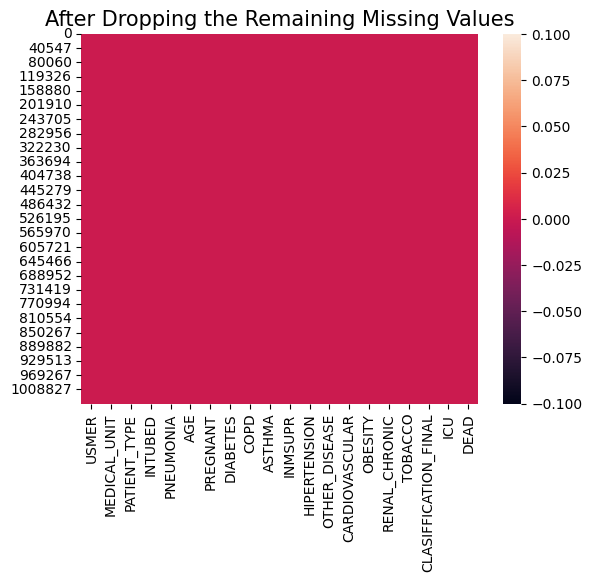

In [89]:
# Plot missing values
sns.heatmap(df_model.isnull())
plt.title('After Dropping the Remaining Missing Values', color = 'black', fontsize = 15)
plt.show()

###### Removing unnecessary features

In [91]:
df_model.columns

Index(['USMER', 'MEDICAL_UNIT', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD'],
      dtype='object')

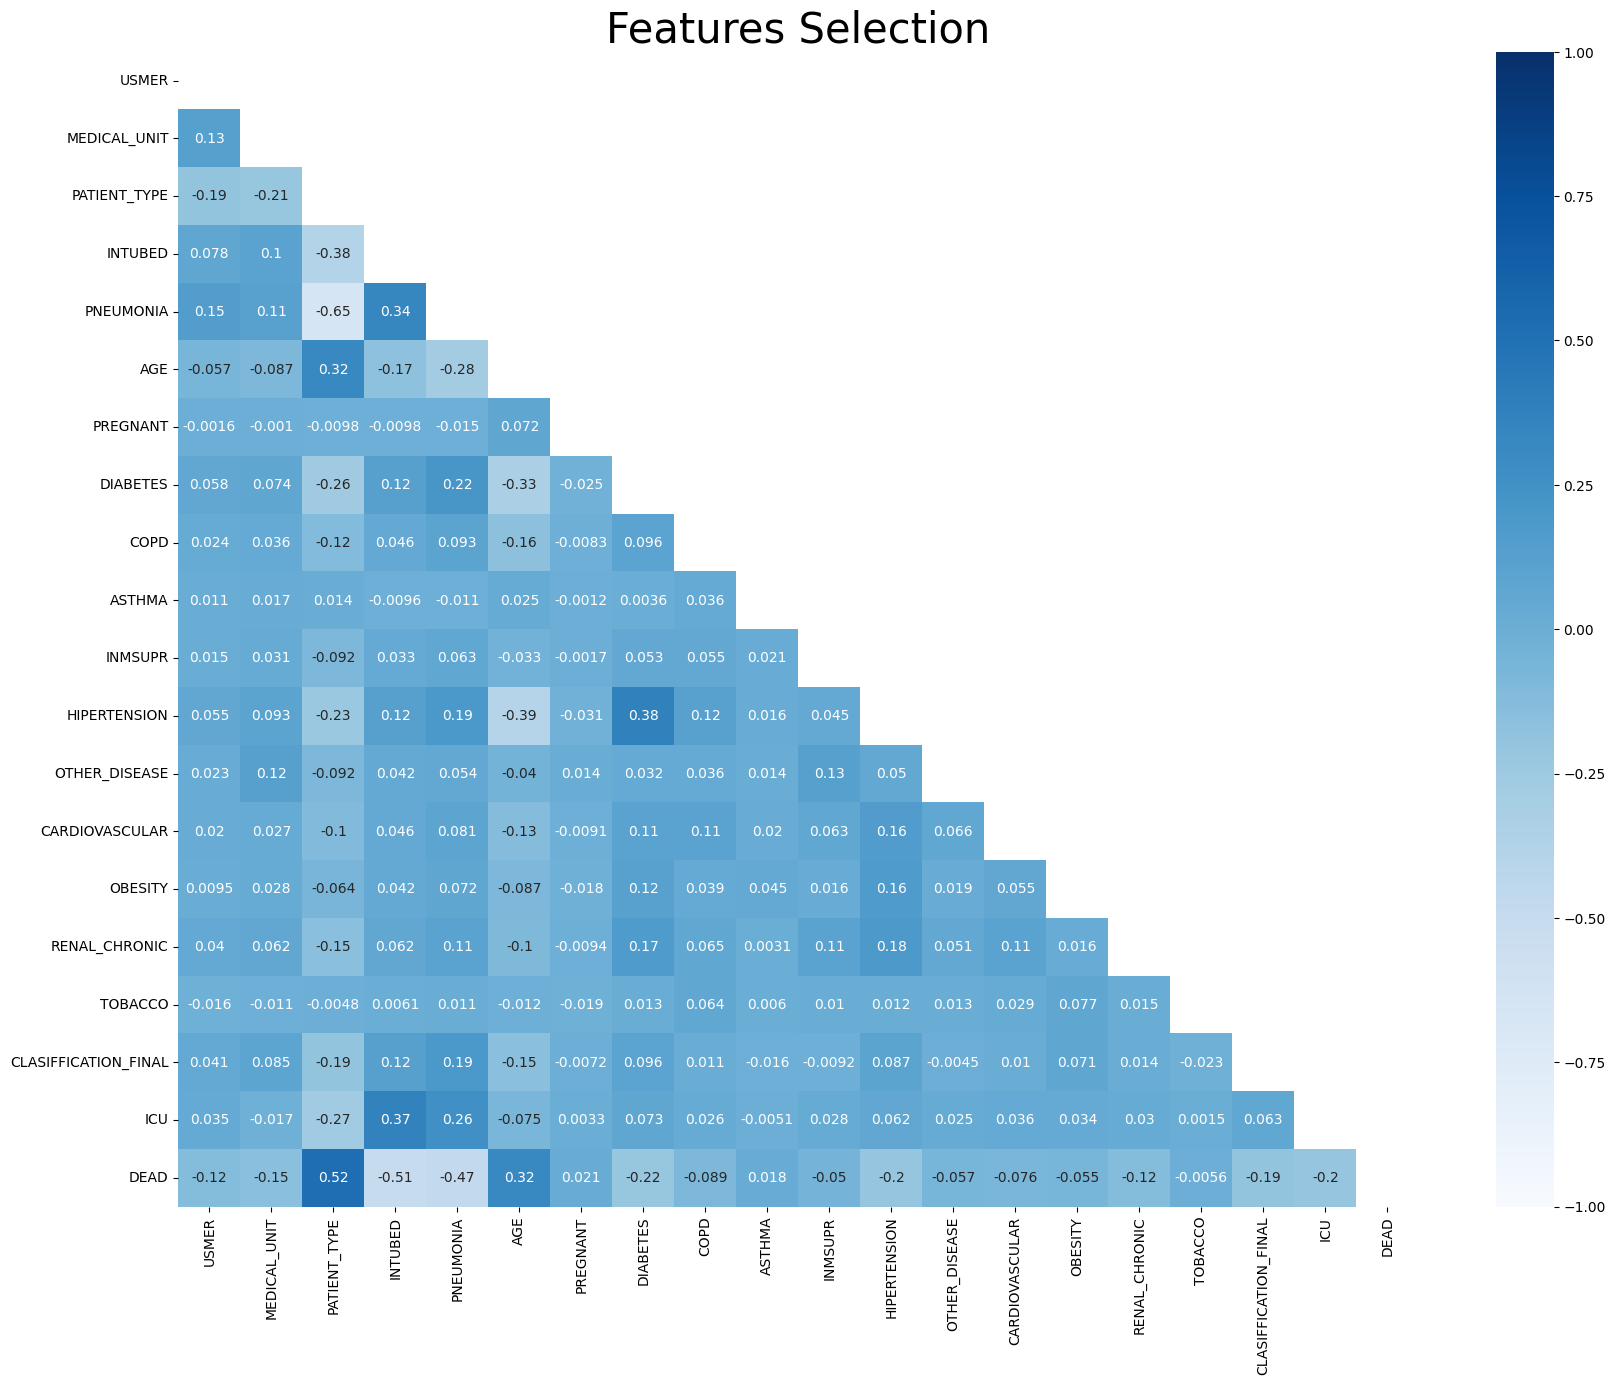

In [94]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df_model.corr()))
sns.heatmap(df_model.corr(), annot = True, cmap = "Blues", vmin = -1, vmax = 1, mask = mask)
plt.title('Features Selection', color = 'black', fontsize = 30)
plt.show()

In [95]:
# Remove irrelevant features from df_model by dropping specified columns
unrelevant_features = ["PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]
df_model.drop(columns=unrelevant_features,inplace=True)

###### Data Splitting

In [96]:
X = df_model.drop('DEAD' , axis= 1)
Y = df_model['DEAD']

In [97]:
# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

###### Checking for Correlated Features

In [99]:
X_train.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,ICU
304766,2,4,1,2.0,2.0,10.0,2.0,2.0,2.0,7,2.0
64146,2,4,1,2.0,2.0,57.0,2.0,2.0,2.0,3,2.0
1048272,1,13,2,2.0,2.0,1.0,2.0,2.0,2.0,7,2.0
43133,1,4,2,1.0,1.0,71.0,2.0,1.0,2.0,3,2.0
257909,2,4,1,2.0,2.0,19.0,2.0,2.0,2.0,7,2.0


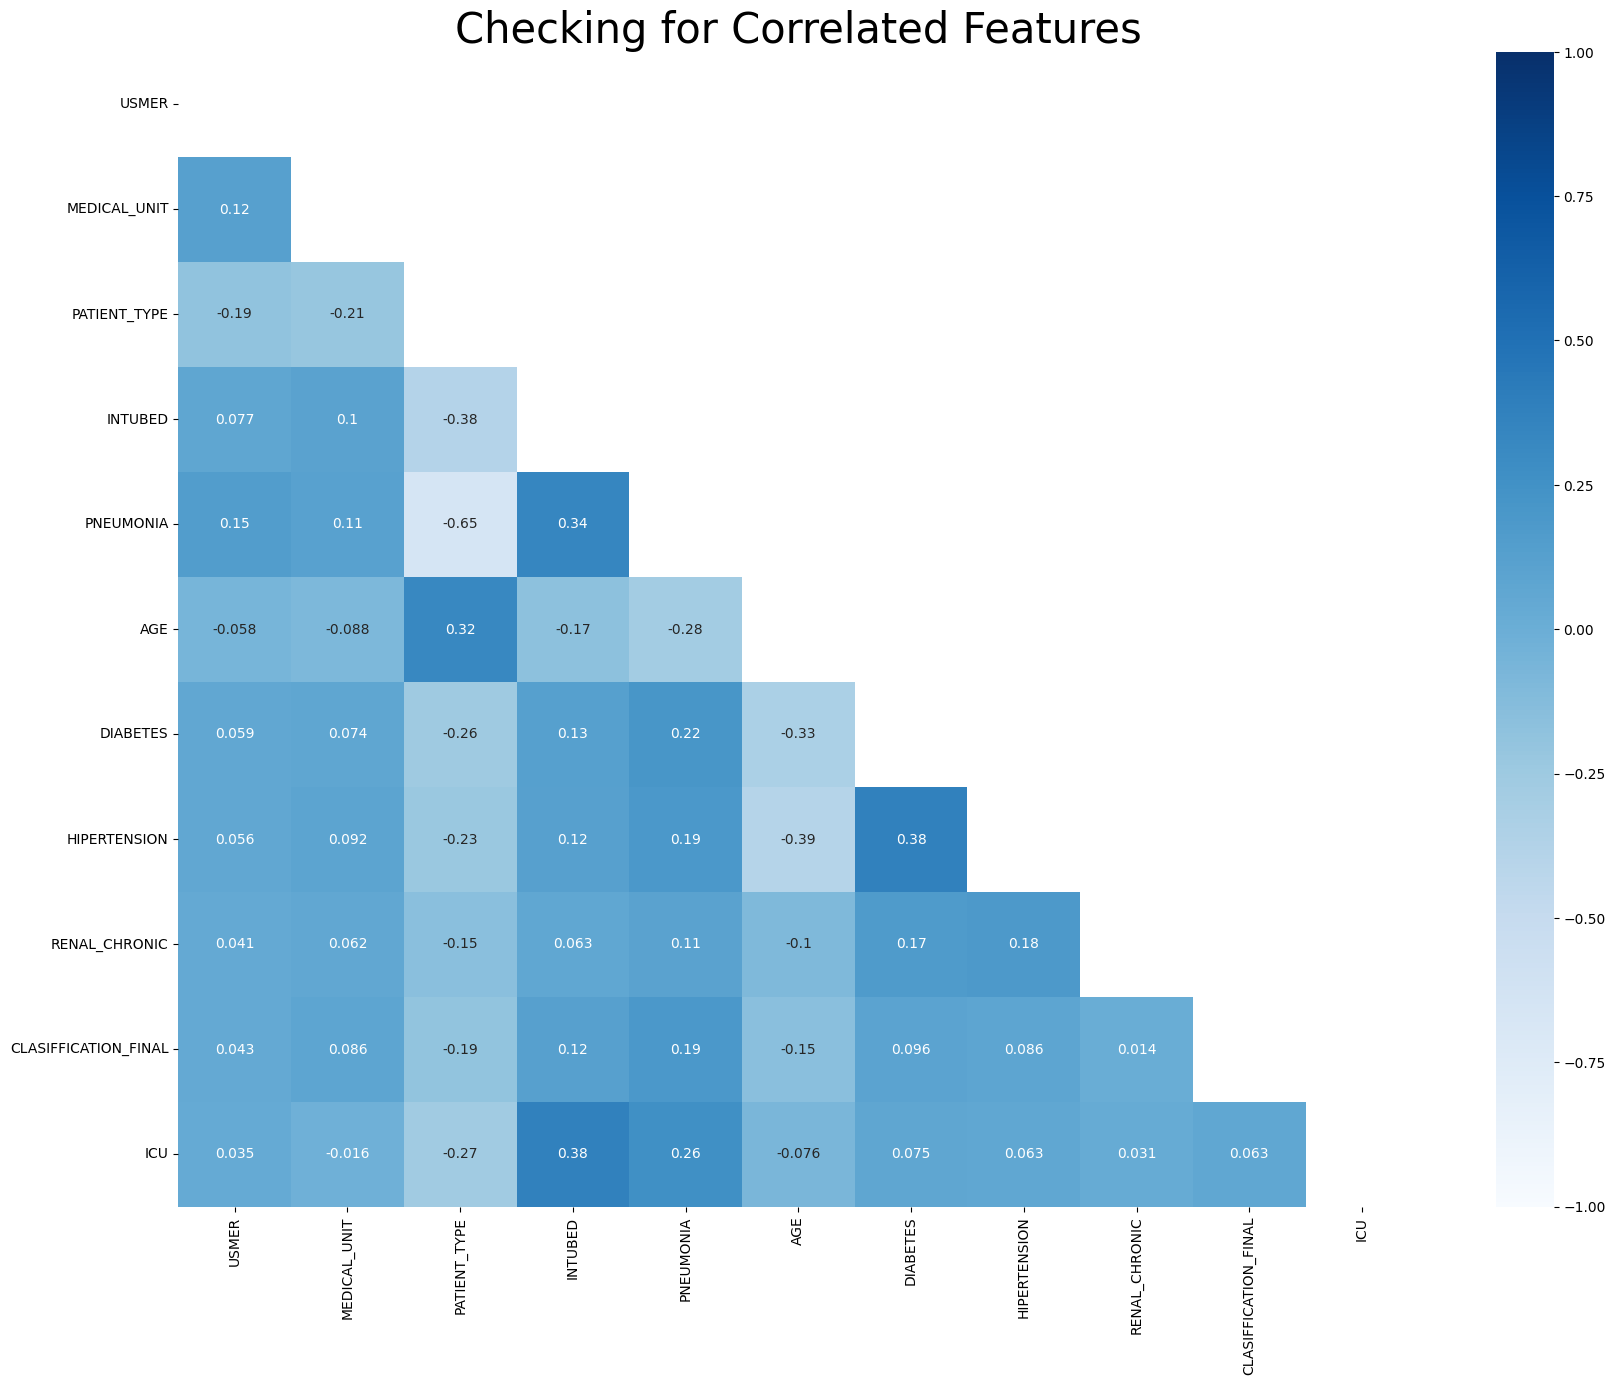

In [100]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(X_train.corr()))
sns.heatmap(X_train.corr(), annot = True, cmap = "Blues", vmin = -1, vmax = 1, mask = mask)
plt.title('Checking for Correlated Features', color = 'black', fontsize = 30)
plt.show()

###### Checking Data for Balance

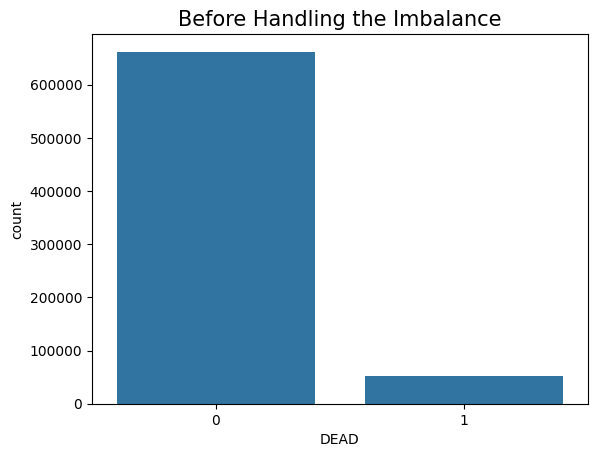

In [101]:
sns.countplot(x = y_train)
plt.title('Before Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

In [102]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

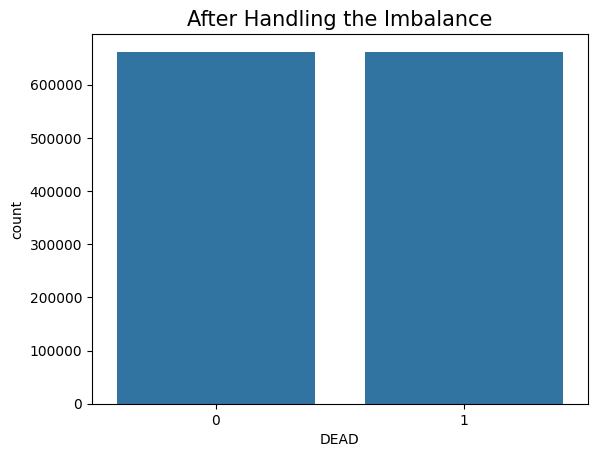

In [103]:
# Let's check the train data again
sns.countplot(x = y_train)
plt.title('After Handling the Imbalance', color = 'black', fontsize = 15)
plt.show()

## Training and Testing

In [118]:
# Initialize the scaler and fit on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression Model

In [119]:
# Initialize and train the model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [120]:
# Make predictions
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

In [121]:
# Get predicted probabilities for ROC curve
y_pred_lr_proba = lr.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class (1)

In [122]:
# Calculate accuracies
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

In [123]:
# Print accuracies
print("Logistic Regression Train Accuracy: ", train_accuracy_lr)
print("Logistic Regression Test Accuracy: ", test_accuracy_lr)

Logistic Regression Train Accuracy:  0.9060449310930716
Logistic Regression Test Accuracy:  0.8999352606901603


In [124]:
# Print classification report for test data
print("\nClassification Report for Test Data:\n")
print(classification_report(y_test, y_test_pred_lr, target_names=['Alive', 'Dead']))


Classification Report for Test Data:

              precision    recall  f1-score   support

       Alive       0.99      0.90      0.94    284090
        Dead       0.41      0.91      0.56     21752

    accuracy                           0.90    305842
   macro avg       0.70      0.91      0.75    305842
weighted avg       0.95      0.90      0.92    305842



In [125]:
# Save the model
joblib.dump(lr, '/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING FOR DATA SCIENCE/lr_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING FOR DATA SCIENCE/lr_model.pkl']

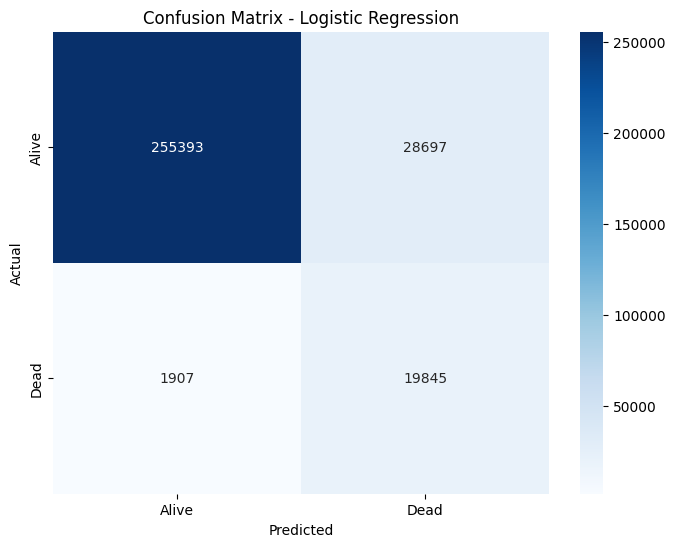

In [126]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Alive', 'Dead'],
            yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

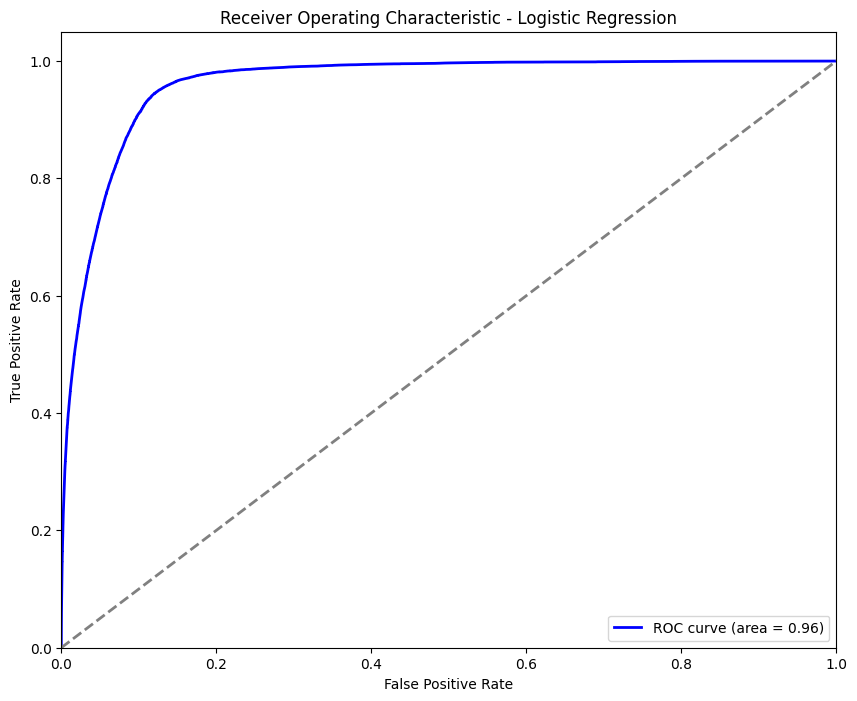

In [127]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_proba)
roc_auc = roc_auc_score(y_test, y_pred_lr_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [128]:
# Test the model with some rows in the test data
print("Logistic Regression Model Predictions on Test Data:")
print(lr.predict(X_test.head()))

Logistic Regression Model Predictions on Test Data:
[1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#### Random Forest Classifier

In [129]:
# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [130]:
# Make predictions
y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

In [131]:
# Get predicted probabilities for ROC curve
y_pred_rf_proba = rf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class (1)

In [132]:
# Calculate accuracies
train_accurac_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

In [133]:
# Print accuracies
print("Random Forest Train Accuracy: ", train_accurac_rf)
print("Random Forest Test Accuracy: ", test_accuracy_rf)

Random Forest Train Accuracy:  0.9527551444213705
Random Forest Test Accuracy:  0.9159010207885118


In [134]:
# Print classification report for test data
print("\nClassification Report for Test Data:\n")
print(classification_report(y_test, y_test_pred_rf, target_names=['Alive', 'Dead']))


Classification Report for Test Data:

              precision    recall  f1-score   support

       Alive       0.98      0.93      0.95    284090
        Dead       0.45      0.79      0.57     21752

    accuracy                           0.92    305842
   macro avg       0.72      0.86      0.76    305842
weighted avg       0.95      0.92      0.93    305842



In [135]:
# Save the model
joblib.dump(rf, '/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING FOR DATA SCIENCE/rf_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING FOR DATA SCIENCE/rf_model.pkl']

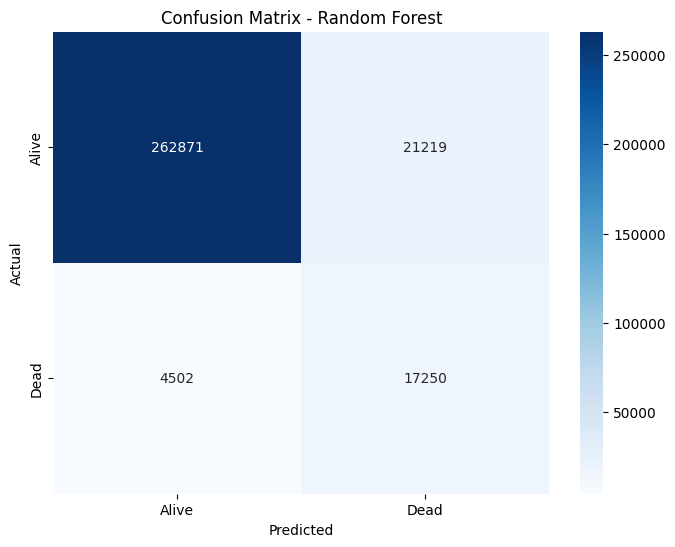

In [136]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

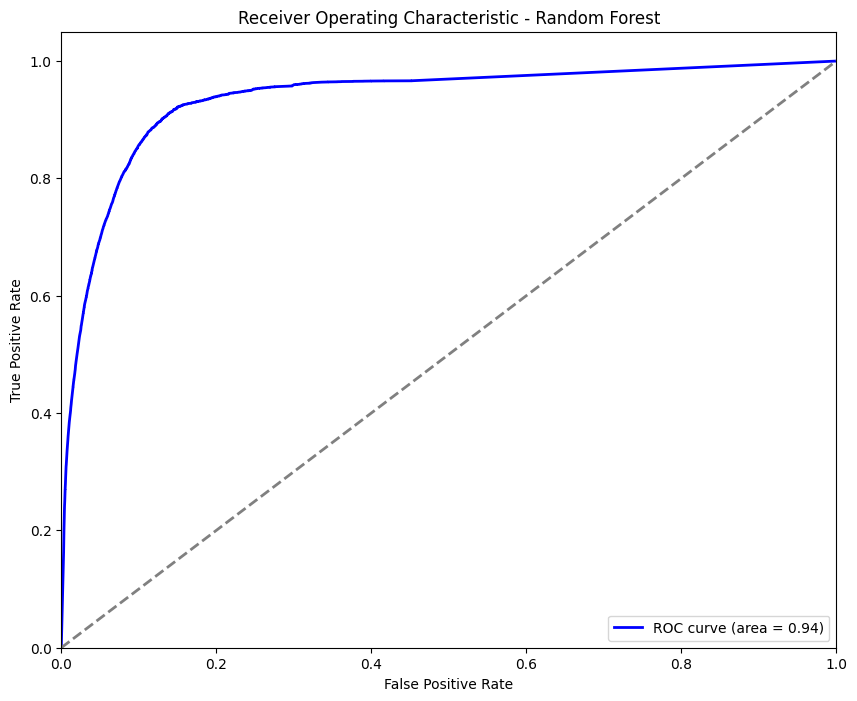

In [137]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_proba)
roc_auc = roc_auc_score(y_test, y_pred_rf_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [138]:
# Test the model with some rows in the test data
print("Random Forest Model Predictions on Test Data:")
print(rf.predict(X_test.head()))

Random Forest Model Predictions on Test Data:
[0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


#### Neural Network (MLP Classifier)

In [139]:
# Initialize and train the MLP Classifier
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [140]:
# Make predictions
y_train_pred_mlp = mlp.predict(X_train_scaled)
y_test_pred_mlp = mlp.predict(X_test_scaled)

In [141]:
# Get predicted probabilities for ROC curve
y_pred_nn_proba = mlp.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class (1)

In [142]:
# Calculate accuracies
train_accuracy_mlp = accuracy_score(y_train, y_train_pred_mlp)
test_accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)

In [143]:
# Print accuracies
print("MLP Train Accuracy: ", train_accuracy_mlp)
print("MLP Test Accuracy: ", test_accuracy_mlp)

MLP Train Accuracy:  0.9291893524636586
MLP Test Accuracy:  0.900873653716625


In [144]:
# Print classification report for test data
print("\nClassification Report for Test Data:\n")
print(classification_report(y_test, y_test_pred_mlp, target_names=['Alive', 'Dead']))


Classification Report for Test Data:

              precision    recall  f1-score   support

       Alive       0.99      0.90      0.94    284090
        Dead       0.41      0.91      0.57     21752

    accuracy                           0.90    305842
   macro avg       0.70      0.91      0.76    305842
weighted avg       0.95      0.90      0.92    305842



In [145]:
# Save the model
joblib.dump(mlp, '/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING FOR DATA SCIENCE/nn_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING FOR DATA SCIENCE/nn_model.pkl']

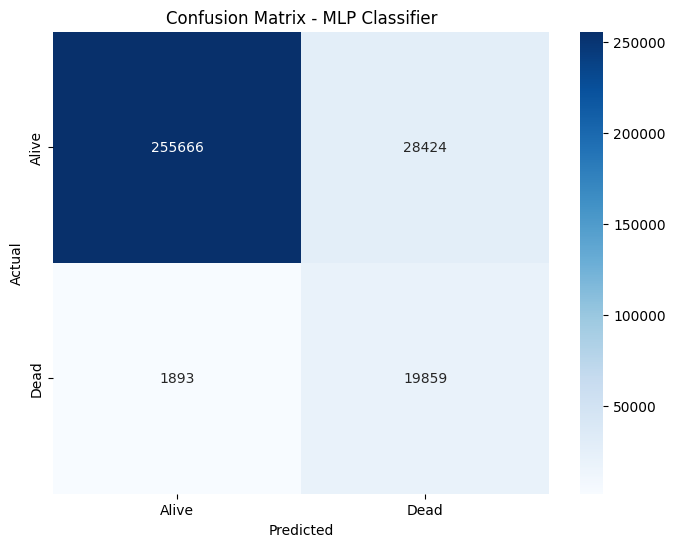

In [146]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_mlp), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP Classifier')
plt.show()

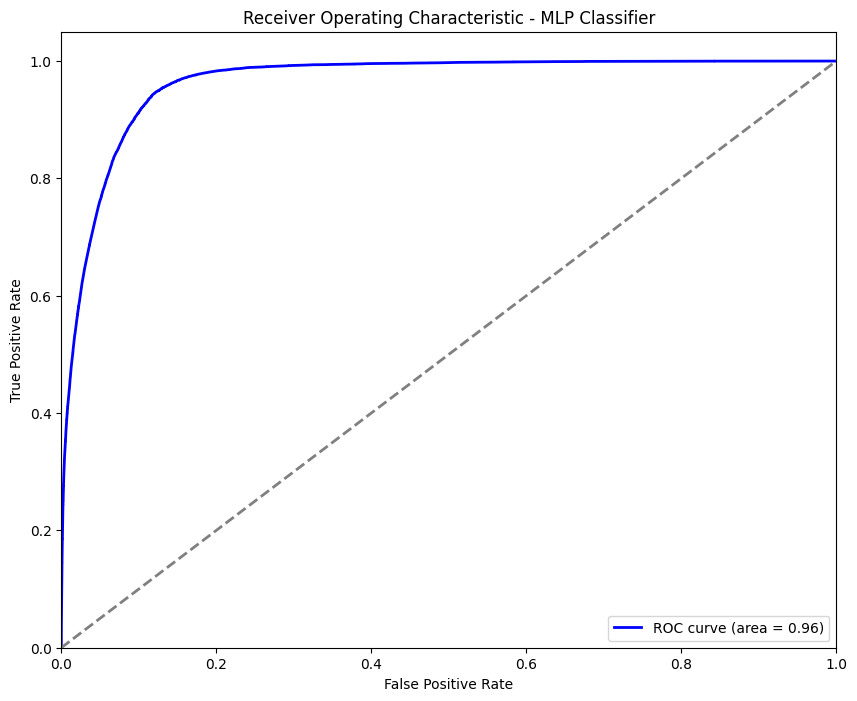

In [147]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nn_proba)
roc_auc = roc_auc_score(y_test, y_pred_nn_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - MLP Classifier')
plt.legend(loc="lower right")
plt.show()

In [148]:
# Test the model with some rows in the test data
print("Neural Network Model Predictions on Test Data:")
print(mlp.predict(X_test.head()))

Neural Network Model Predictions on Test Data:
[0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


#### Determine and Plot the Best Model

In [149]:
# Calculate AUC for each model
auc_lr = roc_auc_score(y_test, y_pred_lr_proba)
auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
auc_nn = roc_auc_score(y_test, y_pred_nn_proba)

In [150]:
# Create a dictionary to store the AUC values
model_auc = {
    'Logistic Regression': auc_lr,
    'Random Forest': auc_rf,
    'Neural Network': auc_nn
}

# Determine the best model based on AUC
best_model_name = max(model_auc, key=model_auc.get)
best_model_auc = model_auc[best_model_name]

In [151]:
# Print the best model details
print(f"The best model is: {best_model_name} with AUC: {best_model_auc}")

The best model is: Neural Network with AUC: 0.9645523614038933


In [153]:
# Prepare predicted probabilities for the best model
if best_model_name == 'Logistic Regression':
    best_model_proba = y_pred_lr_proba
elif best_model_name == 'Random Forest':
    best_model_proba = y_pred_rf_proba
elif best_model_name == 'Neural Network':
    best_model_proba = y_pred_nn_proba

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, best_model_proba)

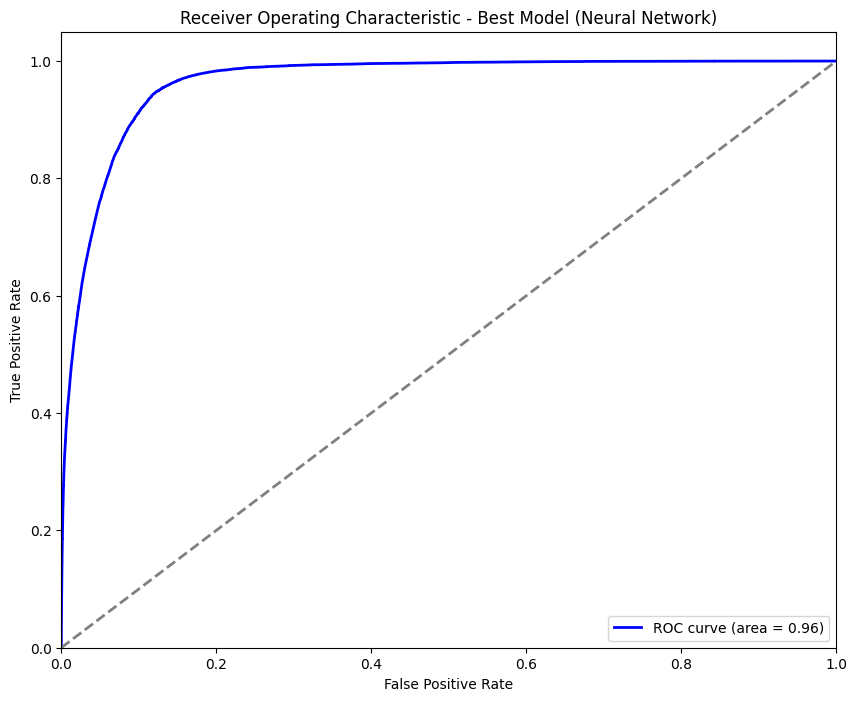

In [154]:
# Plot ROC curve for the best model
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {best_model_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic - Best Model ({best_model_name})')
plt.legend(loc="lower right")
plt.show()

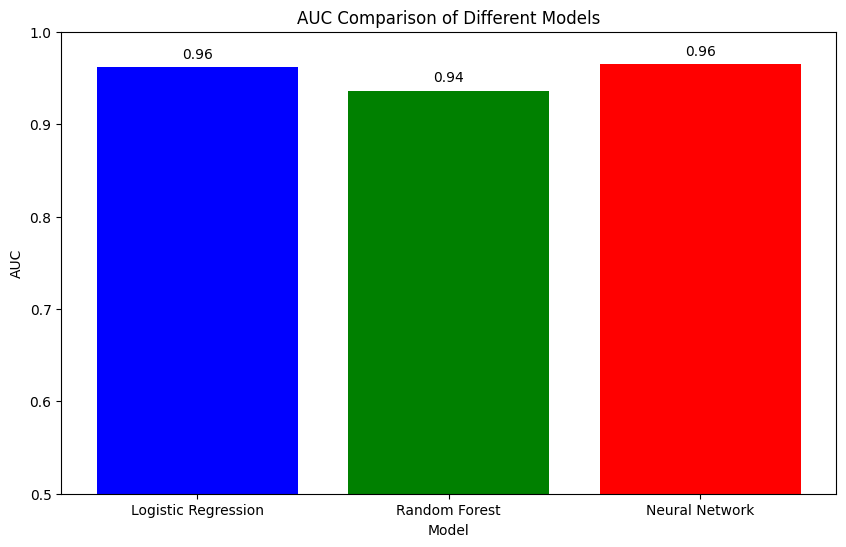

In [155]:
# Plot the AUC values as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_auc.keys(), model_auc.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('AUC')
plt.title('AUC Comparison of Different Models')
plt.ylim(0.5, 1)
for i, v in enumerate(model_auc.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', color='black')
plt.show()

In [156]:
X_test.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,ICU
831440,2,12,1,2.0,2.0,50.0,2.0,2.0,2.0,7,2.0
280057,2,4,1,2.0,2.0,10.0,2.0,2.0,2.0,7,2.0
636220,2,12,1,2.0,2.0,64.0,1.0,1.0,2.0,3,2.0
377691,1,6,1,2.0,2.0,65.0,2.0,1.0,2.0,7,2.0
385487,2,8,2,2.0,1.0,45.0,2.0,2.0,2.0,3,2.0


In [157]:
y_test.head()

831440    0
280057    0
636220    0
377691    0
385487    0
Name: DEAD, dtype: int64

Based on the y_test which contains the target feature we can say that the random forest model did not predict well. So there is overfitting and we can use fin tuning to address that problem.

Therefore the other models performed well and predicted the 5 first rows as [0 0 0 0 0] which means those 5 patients are alive